# Case Study: Netflix Stock Prices Prediction

<img src="https://raw.githubusercontent.com/josefftan/josefftan.github.io/master/assets/img/portfolio/stockprices.png" alt="Girl in a jacket" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Netflix-Stock-Prices-Prediction" data-toc-modified-id="Case-Study:-Netflix-Stock-Prices-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Netflix Stock Prices Prediction</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-Data-Importation" data-toc-modified-id="Libraries-and-Data-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and Data Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Prediction" data-toc-modified-id="Linear-Regression-Prediction-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Linear Regression Prediction</a></span></li><li><span><a href="#SVR-Linear-Prediction" data-toc-modified-id="SVR-Linear-Prediction-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>SVR Linear Prediction</a></span></li><li><span><a href="#SVR-Poly-Prediction" data-toc-modified-id="SVR-Poly-Prediction-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>SVR Poly Prediction</a></span></li><li><span><a href="#Decision-Tree-Prediction" data-toc-modified-id="Decision-Tree-Prediction-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Decision Tree Prediction</a></span></li><li><span><a href="#Random-Forest-Prediction" data-toc-modified-id="Random-Forest-Prediction-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Random Forest Prediction</a></span></li><li><span><a href="#XGB-Prediction" data-toc-modified-id="XGB-Prediction-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>XGB Prediction</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Case-Study:-Facebook-Stock-Price-Prediction" data-toc-modified-id="Case-Study:-Facebook-Stock-Price-Prediction-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Case Study: Facebook Stock Price Prediction</a></span></li><li><span><a href="#Data-Importation" data-toc-modified-id="Data-Importation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Data Importation</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#Model-Visualization" data-toc-modified-id="Model-Visualization-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Model Visualization</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Algorithmic trading is becoming popular over the past few years and also by using robot to do the work for them. It uses a method of executing orders using automated pre-programmed trading instructions. This project will attempt to predict the stock prices of Netflix and Facebook by using machine learning algorithms.


**Problem**
 - Part 1: Predict the price of netflix stock  in the next thirty days.
 - Part 2: Predict the price of Facebook stock in a specific day.

**Dataset**
 - Historical data of Netflix
 - Historical data of Facebook
 
**Source:** Yahoo Finance


# Libraries and Data Importation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('bmh')

In [2]:
# Load the data
df = pd.read_csv('project_data/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-08,378.190002,378.250000,375.359985,376.160004,376.160004,3113400
1,2019-07-09,379.059998,384.760010,377.500000,379.929993,379.929993,6932800
2,2019-07-10,382.769989,384.339996,362.679993,381.000000,381.000000,5878800
3,2019-07-11,381.100006,384.540009,378.799988,379.500000,379.500000,4336300
4,2019-07-12,378.679993,379.739990,372.790009,373.250000,373.250000,6636900


# Data Exploration

In [3]:
# Get the traing days
df.shape

(252, 7)

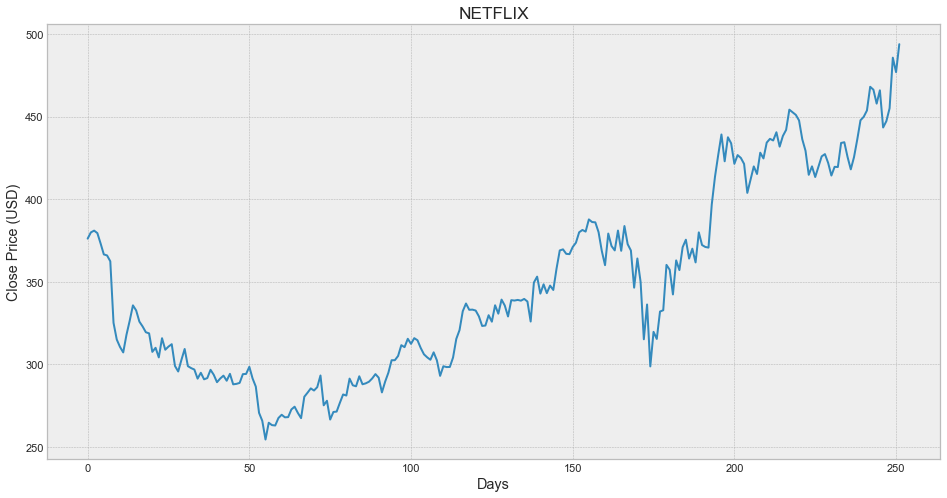

In [4]:
# Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('NETFLIX')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.show()

In [5]:
# Get the close price
df = df[['Close']]
df.head()

,Close
0,376.160004
1,379.929993
2,381.000000
3,379.500000
4,373.250000


# Data Pre-processing

In [6]:
# Create a variable to predict 'x' days out in the future
future_days = 30

# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail()

,Close,Prediction
247,447.239990,NaN
248,455.040009,NaN
249,485.640015,NaN
250,476.890015,NaN
251,493.809998,NaN


In [7]:
# Create the feature dataset(X) and convert it to a numpy array and remove the 'x' rows/days
X = np.array(df.drop(['Prediction'], axis = 1))[:-future_days]
X

array([[376.160004],
       [379.929993],
       [381.      ],
       [379.5     ],
       [373.25    ],
       [366.600006],
       [365.98999 ],
       [362.440002],
       [325.209991],
       [315.100006],
       [310.619995],
       [307.299988],
       [317.940002],
       [326.459991],
       [335.779999],
       [332.700012],
       [325.929993],
       [322.98999 ],
       [319.5     ],
       [318.829987],
       [307.630005],
       [310.100006],
       [304.290009],
       [315.899994],
       [308.929993],
       [310.829987],
       [312.279999],
       [299.109985],
       [295.76001 ],
       [302.799988],
       [309.380005],
       [298.98999 ],
       [297.809998],
       [296.929993],
       [291.440002],
       [294.980011],
       [291.029999],
       [291.769989],
       [296.779999],
       [293.75    ],
       [289.290009],
       [291.519989],
       [293.25    ],
       [290.170013],
       [294.339996],
       [287.98999 ],
       [288.269989],
       [288.8

In [8]:
# Create a target data set (Y) and convert it to a numpy array 
# and get all of the target values except the last 'X' rows/days
y = np.array(df['Prediction'])[:-future_days]
y

array([309.380005, 298.98999 , 297.809998, 296.929993, 291.440002,
       294.980011, 291.029999, 291.769989, 296.779999, 293.75    ,
       289.290009, 291.519989, 293.25    , 290.170013, 294.339996,
       287.98999 , 288.269989, 288.859985, 294.149994, 294.290009,
       298.600006, 291.559998, 286.600006, 270.75    , 265.920013,
       254.589996, 264.75    , 263.309998, 263.079987, 267.619995,
       269.579987, 268.029999, 268.149994, 272.790009, 274.459991,
       270.720001, 267.529999, 280.480011, 282.929993, 285.529999,
       284.25    , 286.279999, 293.350006, 275.299988, 278.049988,
       266.690002, 271.269989, 271.5     , 276.820007, 281.859985,
       281.209991, 291.450012, 287.410004, 286.809998, 292.859985,
       288.029999, 288.589996, 289.570007, 291.570007, 294.179993,
       292.01001 , 283.109985, 289.619995, 295.029999, 302.570007,
       302.600006, 305.160004, 311.690002, 310.480011, 315.549988,
       312.48999 , 315.929993, 314.660004, 309.98999 , 306.160

In [9]:
# Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
# Get the last 'x' rows of the feature dataset 
x_future = df.drop(['Prediction'], axis = 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[370.720001],
       [396.720001],
       [413.549988],
       [426.75    ],
       [439.170013],
       [422.959991],
       [437.48999 ],
       [433.829987],
       [421.420013],
       [426.700012],
       [424.98999 ],
       [421.380005],
       [403.829987],
       [411.890015],
       [419.850006],
       [415.269989],
       [428.149994],
       [424.679993],
       [434.26001 ],
       [436.529999],
       [435.549988],
       [440.519989],
       [431.820007],
       [438.269989],
       [441.950012],
       [454.190002],
       [452.579987],
       [451.040009],
       [447.670013],
       [436.25    ]])

# Model Creation

In [11]:
# Fitting linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

# Fitting SVR to the dataset
from sklearn.svm import SVR
svrl = SVR(kernel = 'linear')
svrl.fit(x_train, y_train)

# Fitting SVR to the dataset
from sklearn.svm import SVR
svrp = SVR(kernel = 'poly')
svrp.fit(x_train, y_train)

# Fitting Decision Tree to the dataset
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree = tree.fit(x_train, y_train)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 20, criterion = 'mse', random_state = 0)
forest.fit(x_train, y_train)

# Fitting XGBoost Regression to the dataset
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print('lr_prediction: ',lr_prediction)

# Show the model SVR linear regression prediction
svrl_prediction = svrl.predict(x_future)
print('svr1_prediction: ', svrl_prediction)

# Show the model SVR Poly prediction
svrp_prediction = svrp.predict(x_future)
print('svrp_prediction: ', svrp_prediction)

# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print('tree_prediction: ', tree_prediction)

# Show the model Random Forest prediction
forest_prediction = forest.predict(x_future)
print('forest_prediction: ', forest_prediction)

# Show the XGBoost prediction
xgb_prediction = xgb.predict(x_future)
print('xgb_prediction: ', xgb_prediction)

print()

lr_prediction:  [382.22789365 406.39708237 422.04197206 434.31249441 445.85794203
 430.789362   444.29621923 440.89393833 429.35782281 434.26602636
 432.67641696 429.32063201 413.00641289 420.49888742 427.89836914
 423.64085778 435.61390669 432.38824865 441.29368091 443.40382678
 442.49282406 447.11285837 439.02549272 445.02129396 448.44218513
 459.82028621 458.32364174 456.89210255 453.75940757 443.14354414]
svr1_prediction:  [383.84238096 406.44435524 421.07477575 432.54963467 443.34643522
 429.25495444 441.88597996 438.70431482 427.91624124 432.50617976
 431.01964617 427.88146202 412.62511373 419.6317501  426.55142363
 422.56998415 433.76665883 430.7501637  439.0781367  441.05145335
 440.19952322 444.51997841 436.95702574 442.56403832 445.76310698
 456.40341234 455.00381551 453.66510231 450.7355422  440.80804835]
svrp_prediction:  [372.97809373 400.16832541 419.78341553 436.32828445 452.85901147
 431.47127286 450.56728536 445.63527583 429.52243617 436.26365856
 434.0620001  429.4719

# Model Evaluation

## Linear Regression Prediction

<ipython-input-13-ec9eb76eee8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


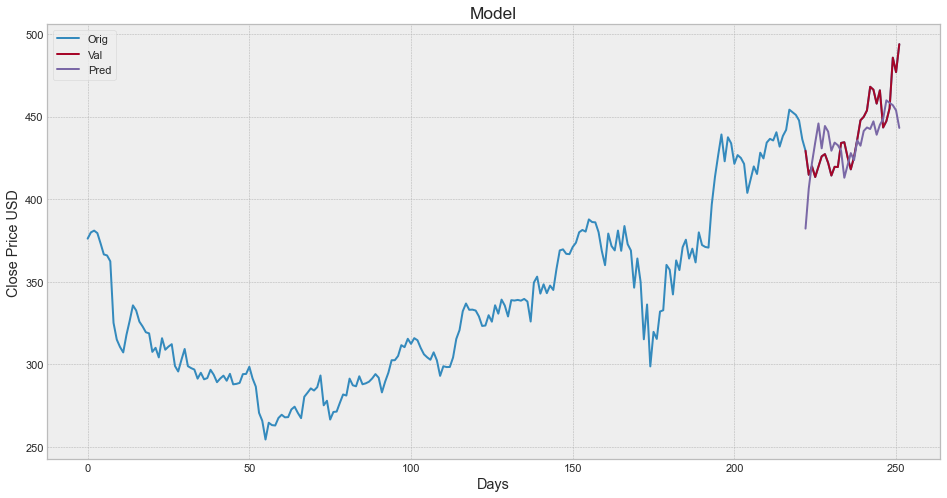

In [13]:
# Visualize the data
Predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

## SVR Linear Prediction

<ipython-input-14-c0869a4836a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


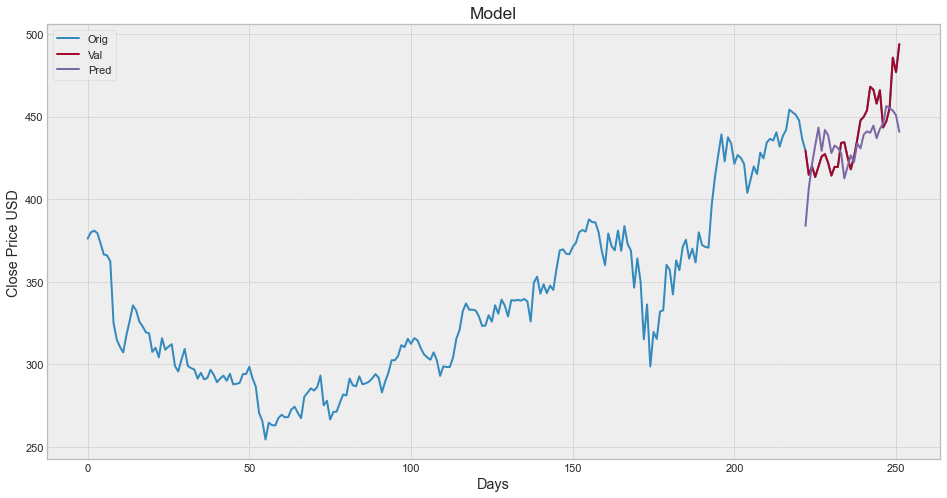

In [14]:
# Visualize the data
Predictions = svrl_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

## SVR Poly Prediction

<ipython-input-15-d51d77364124>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


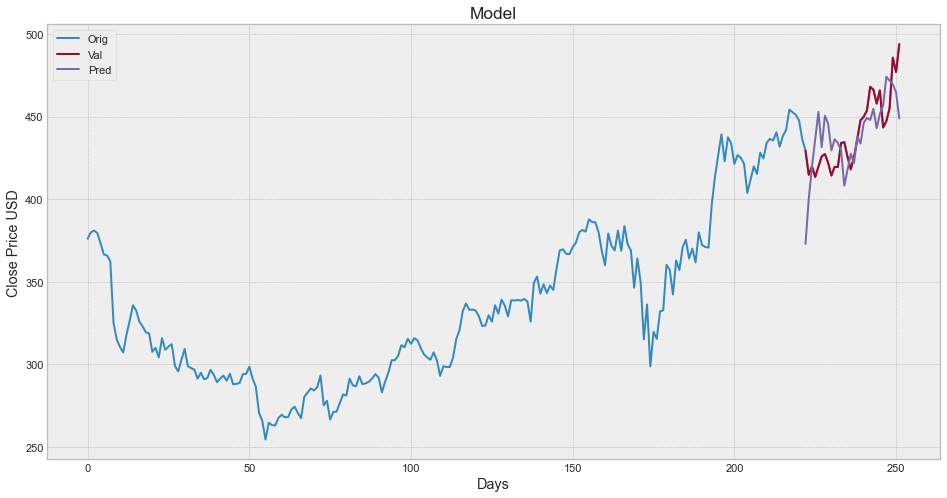

In [15]:
# Visualize the data
Predictions = svrp_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

## Decision Tree Prediction

<ipython-input-16-7901a16d8aac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


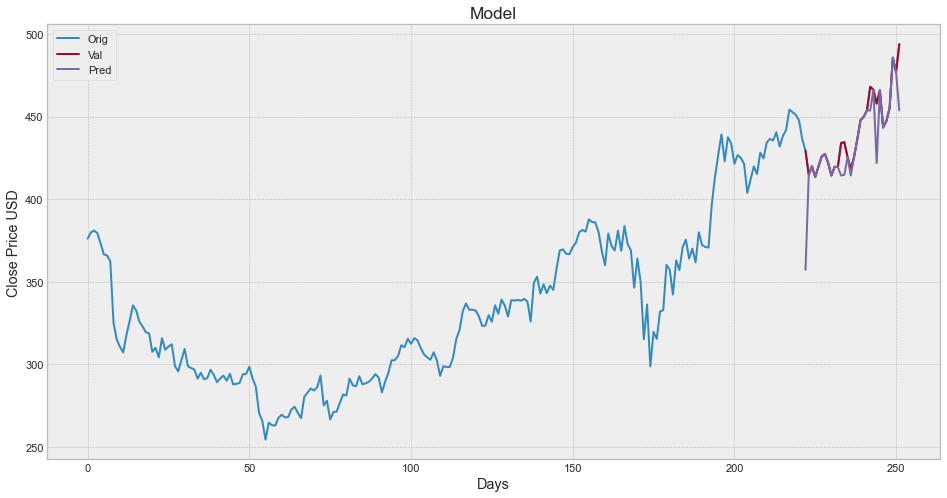

In [16]:
# Visualize the data
Predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

## Random Forest Prediction

<ipython-input-17-17458f1a1ad6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


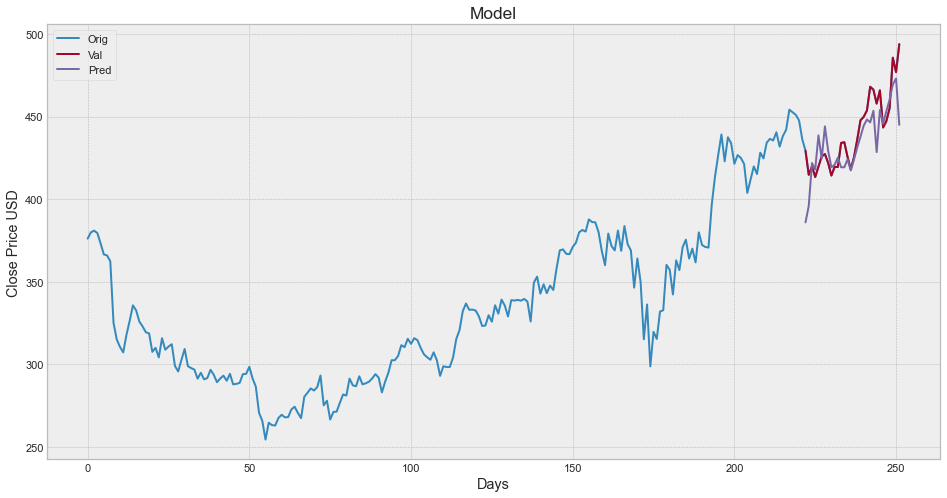

In [17]:
# Visualize the data
Predictions = forest_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

## XGB Prediction

<ipython-input-18-bdc2206736eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


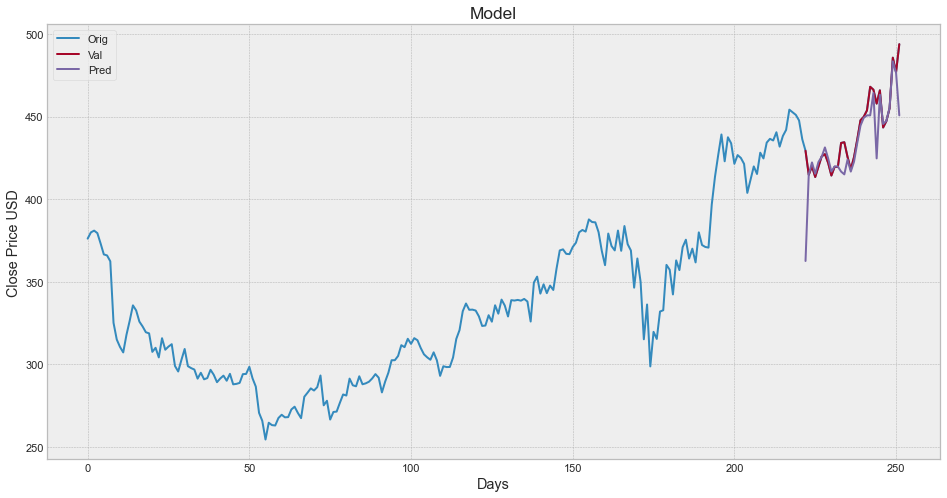

In [18]:
# Visualize the data
Predictions = xgb_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

# Conclusion

It can be observe that Linear Regression and Support Vector Machines prediction are very far from the actual price. Meanwhile, the Decision Tree, Random Forest and XGBOOST model somewhat failed to predict starting days and last remaining days but in the middle days it seems to almost fit the prediction from the actual prices. Nevertheless, this can be further improve by tuning the right hyper parameter and trying different models such as Reinforcement Learning and Artificial Neural Network.

---

# Case Study: Facebook Stock Price Prediction

# Data Importation

In [19]:
# Load the data
df = pd.read_csv('project_data/FB.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,224.589996,232.440002,223.500000,231.910004,231.910004,18223800
1,2020-06-02,230.940002,233.000000,226.559998,232.720001,232.720001,20919000
2,2020-06-03,232.110001,232.649994,228.529999,230.160004,230.160004,15380300
3,2020-06-04,229.559998,231.630005,224.610001,226.289993,226.289993,17041500
4,2020-06-05,226.710007,231.350006,225.309998,230.770004,230.770004,16750400
5,2020-06-08,229.029999,231.550003,227.410004,231.399994,231.399994,15466500
6,2020-06-09,231.520004,239.770004,230.410004,238.669998,238.669998,27462900
7,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.729996,20720700
8,2020-06-11,229.940002,232.889999,223.550003,224.429993,224.429993,26708200
9,2020-06-12,229.899994,231.660004,224.500000,228.580002,228.580002,22071700


In [20]:
# Get the number of rows and columns
df.shape

(21, 7)

# Data Pre-processing

In [21]:
# Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-06-29,209.75,220.75,207.110001,220.639999,220.639999,58514300


In [22]:
# Prepare the data for training the models
# get all the data except for the last row
df = df.head(len(df)-1)

#print the new dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,224.589996,232.440002,223.500000,231.910004,231.910004,18223800
1,2020-06-02,230.940002,233.000000,226.559998,232.720001,232.720001,20919000
2,2020-06-03,232.110001,232.649994,228.529999,230.160004,230.160004,15380300
3,2020-06-04,229.559998,231.630005,224.610001,226.289993,226.289993,17041500
4,2020-06-05,226.710007,231.350006,225.309998,230.770004,230.770004,16750400
5,2020-06-08,229.029999,231.550003,227.410004,231.399994,231.399994,15466500
6,2020-06-09,231.520004,239.770004,230.410004,238.669998,238.669998,27462900
7,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.729996,20720700
8,2020-06-11,229.940002,232.889999,223.550003,224.429993,224.429993,26708200
9,2020-06-12,229.899994,231.660004,224.500000,228.580002,228.580002,22071700


In [23]:
# Create empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [24]:
# Get the date and adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [25]:
# Create the indepedent dataset
for day in df_days:
    days.append( [int(day.split('-')[2])] )
    
# Create the dependent dataset
for adj_close_price in df_adj_close:
    adj_close_prices.append( float(adj_close_price) )

In [26]:
#print the days and the adj close prices
print(days)
print(adj_close_prices)

[[1], [2], [3], [4], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26]]
[231.91000400000001, 232.72000099999997, 230.16000400000001, 226.289993, 230.770004, 231.399994, 238.669998, 236.729996, 224.42999300000002, 228.580002, 232.5, 235.649994, 235.52999900000003, 235.940002, 238.789993, 239.22000099999997, 242.24000499999997, 234.020004, 235.67999300000002, 216.080002]


# Model Creation

In [27]:
# Create models
from sklearn.svm import SVR

# Create and train  a SVR model using a linear kernel
lin_svr = SVR(kernel = 'linear', C= 1000.0)
lin_svr.fit(days, adj_close_prices)

# Create and train  a SVR model using a linear kernel
poly_svr = SVR(kernel = 'poly', degree = 2, C= 1000.0)
poly_svr.fit(days, adj_close_prices)

# Create and train  a SVR model using a linear kernel
rbf_svr = SVR(kernel = 'rbf', gamma = 0.15, C= 1000.0)
rbf_svr.fit(days, adj_close_prices)

# Fitting Decision Tree to the dataset
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree = tree.fit(days, adj_close_prices)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 20, criterion = 'mse', random_state = 0)
forest.fit(days, adj_close_prices)

RandomForestRegressor(n_estimators=20, random_state=0)

# Model Visualization

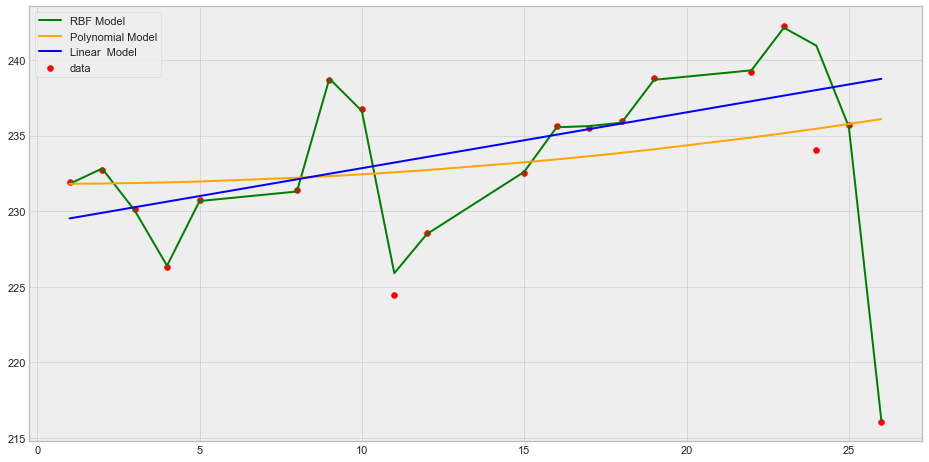

In [28]:
# Plot the model on the graph to see which has the best fit on the original data
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear  Model')
plt.legend()
plt.show()

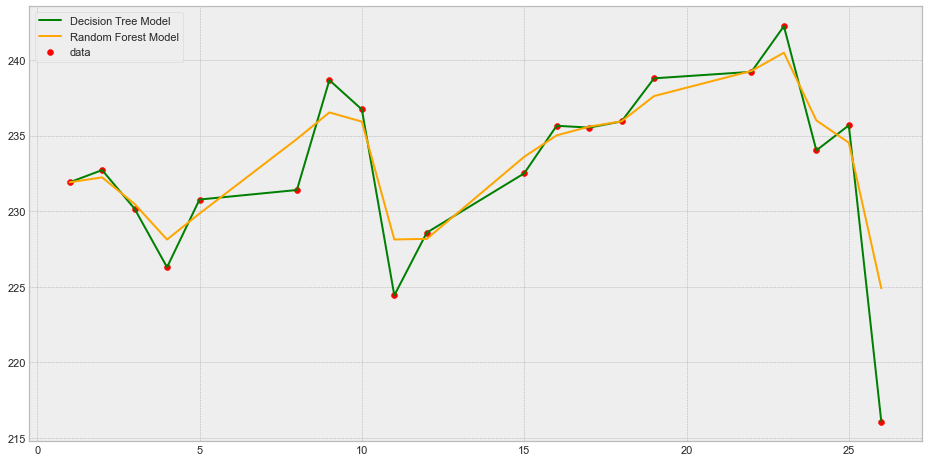

In [29]:
# Plot the model on the graph to see which has the best fit on the original data
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'data')
plt.plot(days, tree.predict(days), color = 'green', label = 'Decision Tree Model')
plt.plot(days, forest.predict(days), color = 'orange', label = 'Random Forest Model')
plt.legend()
plt.show()

# Model Evaluation

In [30]:
# Show the predicted price for the given day
day = [[30]]

print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Decision Tree predicted:', tree.predict(day))
print('The Random Forest predicted:', forest.predict(day))

The Linear SVR predicted: [240.23070864]
The Polynomial SVR predicted: [237.51221858]
The RBF SVR predicted: [213.69266326]
The Decision Tree predicted: [216.080002]
The Random Forest predicted: [224.89600075]


In [31]:
# print the actual price of the stock on day 30
print('The actual price:', actual_price['Adj Close'][20])

The actual price: 220.63999900000002


# Conclusion

The Decision Tree and Random Forest model has the closer value in predicting the actual price. Machine learning can be used as a range of guidance in how much will the stock will go up or down but can not guarantee for a high accuracy and precision. There can be a lot of factors to be consider when it comes to predicting the stock market prices.